In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}
// Avoid scrollable output for many plots

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import itertools
import tqdm
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
name = 'Skoda Octavia'
df = pd.read_parquet('data_2020-Oct-12.parquet')
print('Number cars: {}'.format(df.shape[0]));
df.drop_duplicates(inplace=True)
print('Number cars: {}'.format(df.shape[0]));
#df["fuelTypeGasoline"] = df["fuelTypeGasoline"].astype(int)
#df["carTypeStationCar"] = df["carTypeStationCar"].astype(int)

df.head()

Number cars: 1184
Number cars: 532


,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim
0,"Skoda Octavia 1,5 TSi 150 Style Combi DSG 5d",2020,13000.0,264900.0,"Business Line,, 16"" Alufælge, 2 Zone Klima, Pa...",150.0,Syd- og Sønderjylland,False,True,True,"1,5",Style
1,"Skoda Octavia 1,4 TSi 140 Elegance DSG 5d",2014,98000.0,139800.0,"!!SOLGT!!Candy White, 18"" Originale Alufælge, ...",140.0,Fyn,False,True,False,"1,4",Elegance
2,"Skoda Octavia 1,2 TSi 110 Active 5d",2016,145000.0,128980.0,"Moon White Metallic, Fartpilot, Navigation, Mu...",110.0,Østjylland,True,True,False,"1,2",Active
3,"Skoda Octavia 1,5 TSi 150 Ambition DSG 5d",2020,10000.0,239900.0,"Metallak - Moon White, Aut.Gear/Tiptronic, Air...",150.0,Nordjylland,False,True,False,"1,5",Ambition
5,"Skoda Octavia 1,0 TSi 115 Style Combi 5d",2018,38000.0,199900.0,"BM. STYLE MODEL !! 16"" Alufælge, 2 Zone Klima,...",115.0,Syd- og Vestsjælland,True,True,True,"1,0",Style


In [3]:
df[df.isnull().any(axis=1)]

,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim


In [4]:
print('Number cars: {}'.format(df.shape[0]));
df = df[df.price < 400_000]
print('Number cars: {}'.format(df.shape[0]));

Number cars: 532
Number cars: 530


In [5]:
df.describe()

,year,odometer,price,horsepower
count,530.000000,530.000000,530.000000,530.000000
mean,2015.701887,100575.749057,169924.279245,131.215094
std,2.793084,62896.622242,66685.853632,25.636232
min,2010.000000,1000.000000,49900.000000,86.000000
25%,2014.000000,51000.000000,119900.000000,105.000000
50%,2016.000000,98000.000000,164850.000000,122.000000
75%,2018.000000,146500.000000,219900.000000,150.000000
max,2021.000000,281000.000000,369900.000000,245.000000


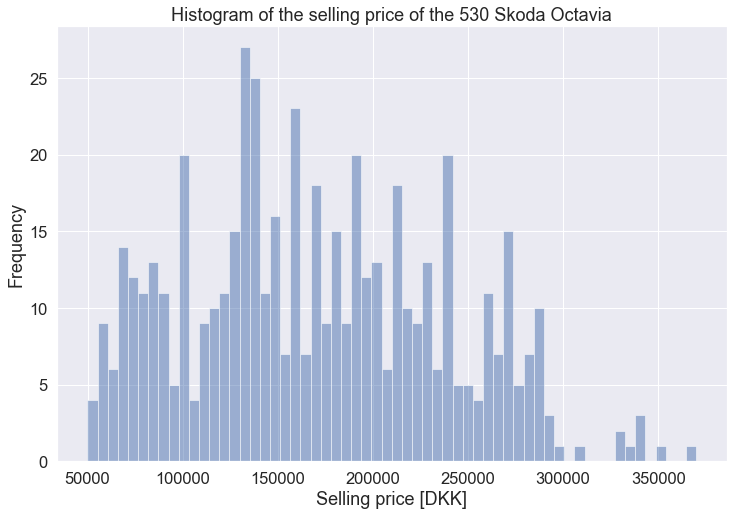

In [6]:
plt.rcParams["figure.figsize"] =(12,8)
ax = df['price'].plot.hist(bins=60, alpha=0.5);
ax.set_xlabel('Selling price [DKK]');
ax.set_title(f"Histogram of the selling price of the {df.shape[0]} {name}");

In [7]:
# Plot correlation matrix
corr = df.corr()
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price,horsepower,transmissionManual,fuelTypeGasoline,carTypeStationCar
year,1.00,-0.74,0.90,0.42,-0.51,0.06,0.25
odometer,-0.74,1.00,-0.81,-0.36,0.34,-0.31,-0.11
price,0.90,-0.81,1.00,0.61,-0.60,0.08,0.33
horsepower,0.42,-0.36,0.61,1.00,-0.38,0.18,0.15
transmissionManual,-0.51,0.34,-0.60,-0.38,1.00,0.08,-0.23
fuelTypeGasoline,0.06,-0.31,0.08,0.18,0.08,1.00,-0.14
carTypeStationCar,0.25,-0.11,0.33,0.15,-0.23,-0.14,1.00


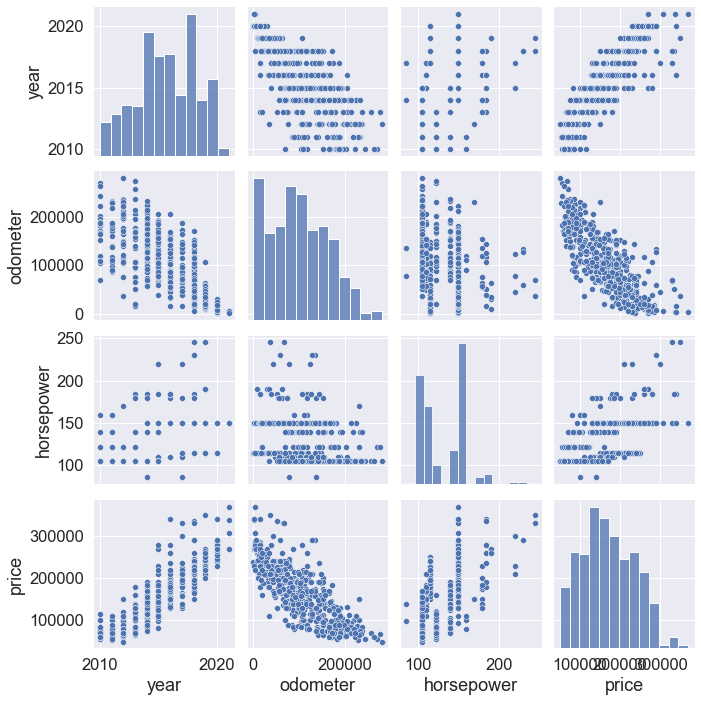

In [8]:
sns.pairplot(df[['year', 'odometer', 'horsepower', 'price']].copy());

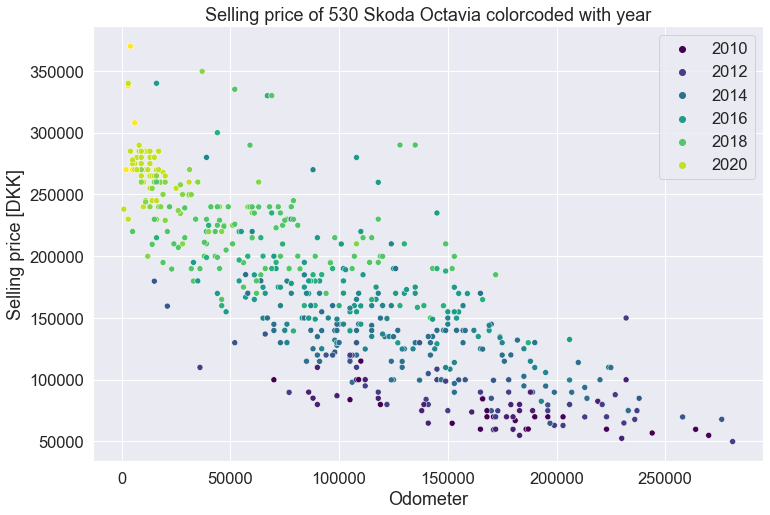

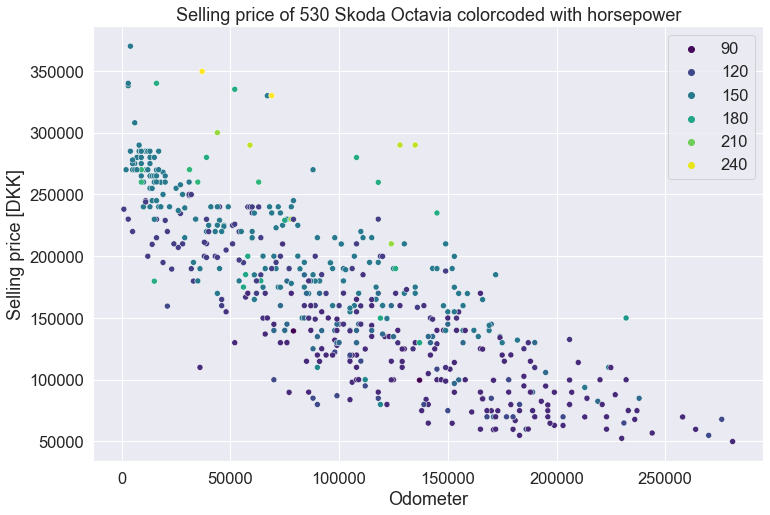

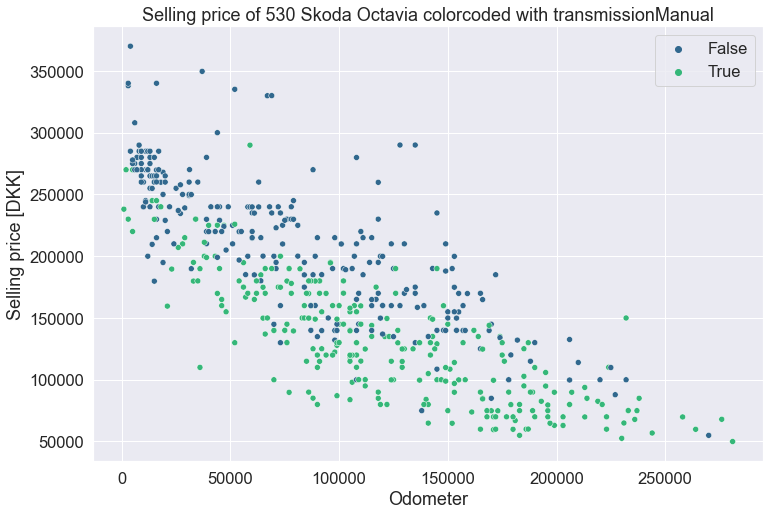

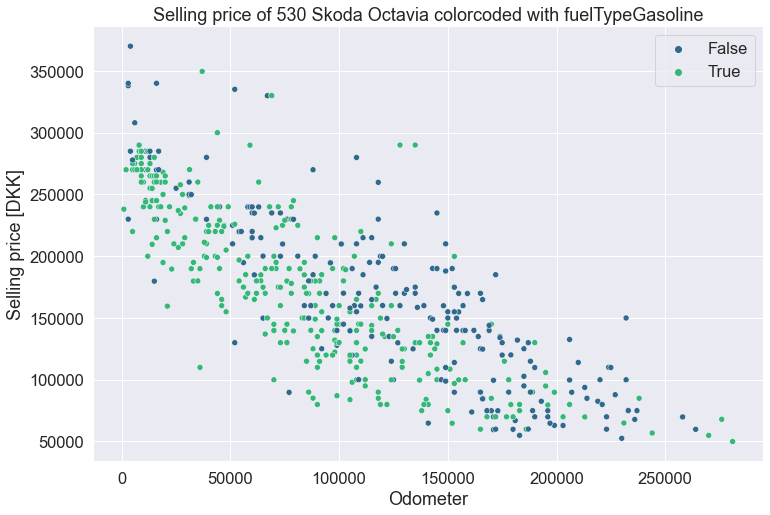

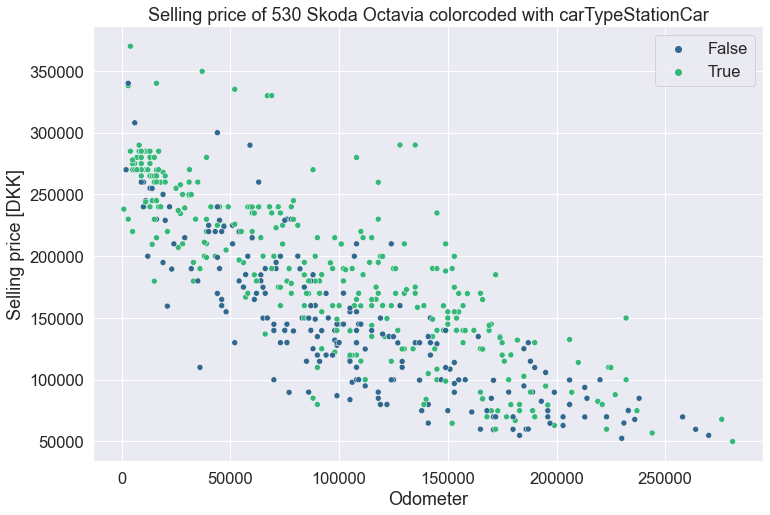

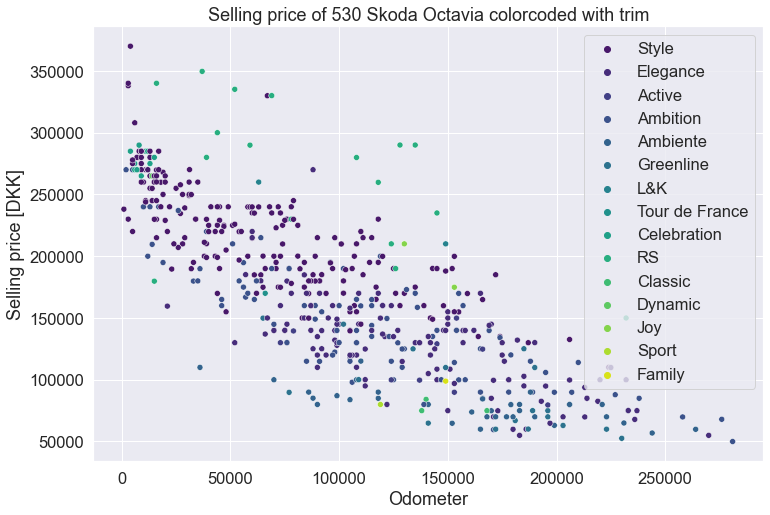

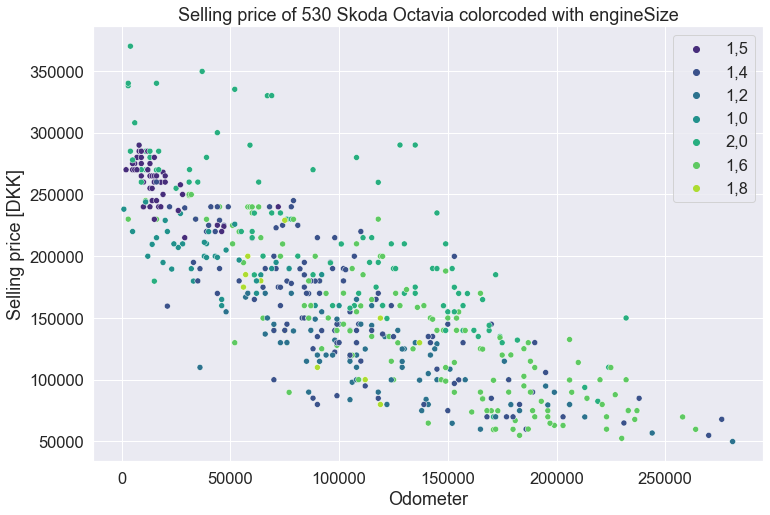

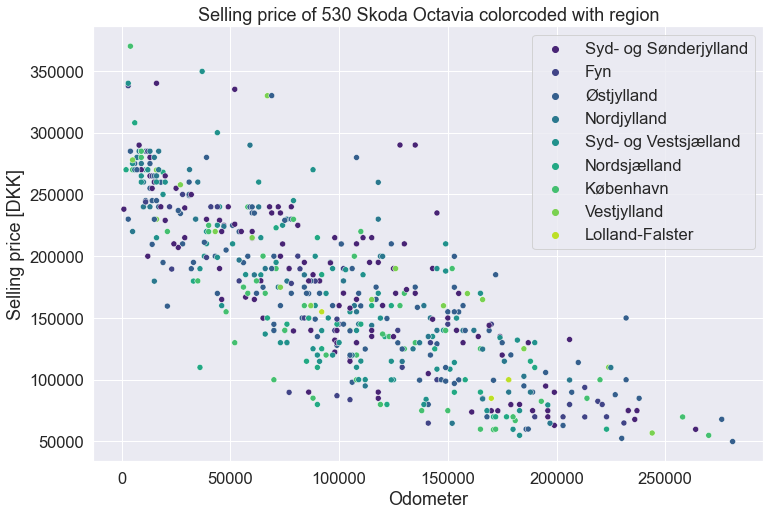

In [9]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    'horsepower',
    'transmissionManual',
    'fuelTypeGasoline',
    'carTypeStationCar',
    'trim',
    'engineSize',
    'region',
    ]:
    ax = sns.scatterplot(x="odometer", y="price", hue=df[hue].tolist(), data=df, palette='viridis')
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df.shape[0]} {name} colorcoded with {hue}');
    plt.show()

# Selected

In [23]:
# Find cars comparable to my own
selected_name = 'Skoda Octavia, Style, DSG, ~100.000 km'
df_selected = df[
    (df.odometer < 130000) &
    (df.odometer > 80000) &
    (df.trim == 'Style') &
    (df.transmissionManual == True)
    # (df.fuelTypeGasoline == False)
    # (df.carTypeStationCar == False)
]
print(f'Number of selected cars: {df_selected.shape[0]}')
df_selected.head()


Number of selected cars: 20


,headline,year,odometer,price,description,horsepower,region,transmissionManual,fuelTypeGasoline,carTypeStationCar,engineSize,trim
55,"Skoda Octavia 1,4 TSi 150 Style 5d",2016,83000.0,149900.0,2 ZONE KLIMA \nAPPLE CARPLAY\nANDROID AUTO\nPA...,150.0,Østjylland,True,True,False,"1,4",Style
62,"Skoda Octavia 1,6 TDi 115 Style 5d",2018,94000.0,169800.0,1 EJER - FULD SERVICEBOG HOS SKODA - SOMMER/VI...,115.0,Syd- og Vestsjælland,True,False,False,"1,6",Style
87,"Skoda Octavia 1,0 TSi 115 Style Combi 5d",2017,91000.0,179900.0,Usandsynligt Velholdt!!! \nPragteksemplar. Båd...,115.0,København,True,True,True,"1,0",Style
131,"Skoda Octavia 1,4 TSi 150 Style Combi 5d",2016,91000.0,179900.0,KONKTAKT OS FOR VIDEOFREMVISNING. Highlights:\...,150.0,Syd- og Sønderjylland,True,True,True,"1,4",Style
153,"Skoda Octavia 1,4 TSi 150 Style Combi 5d",2017,89000.0,179800.0,"Velkørende Stationcar Med Det Rette Udstyr, So...",150.0,Fyn,True,True,True,"1,4",Style


In [24]:
df_selected.describe()

,year,odometer,price,horsepower
count,20.000000,20.000000,20.000000,20.000000
mean,2016.450000,97650.000000,168579.450000,132.500000
std,0.759155,12205.585434,15370.102344,19.901071
min,2016.000000,82000.000000,139500.000000,110.000000
25%,2016.000000,86750.000000,154900.000000,110.000000
50%,2016.000000,95000.000000,169944.500000,150.000000
75%,2017.000000,105500.000000,179900.000000,150.000000
max,2018.000000,126000.000000,194500.000000,150.000000


In [25]:
# Plot correlation matrix
corr = df_selected[['year', 'odometer', 'price']].corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap=cmap);
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1).set_precision(2)

,year,odometer,price
year,1.00,-0.39,0.59
odometer,-0.39,1.00,-0.28
price,0.59,-0.28,1.00


In [26]:
df_selected.year.unique()

array([2016, 2018, 2017])

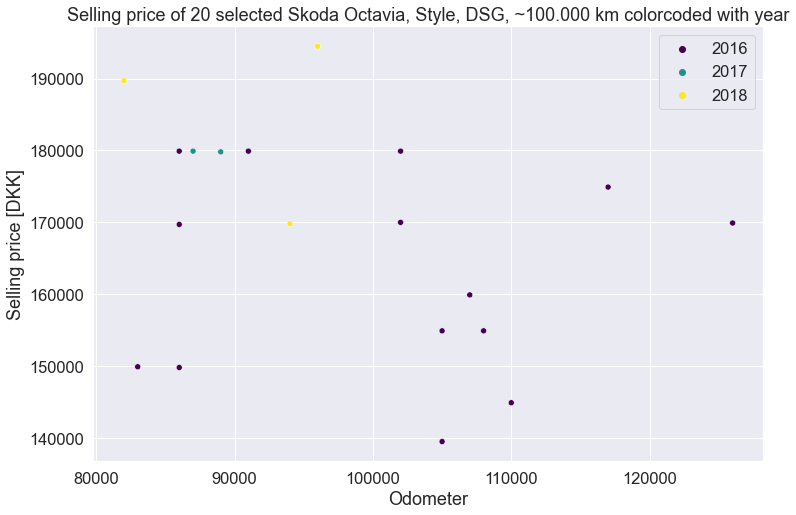

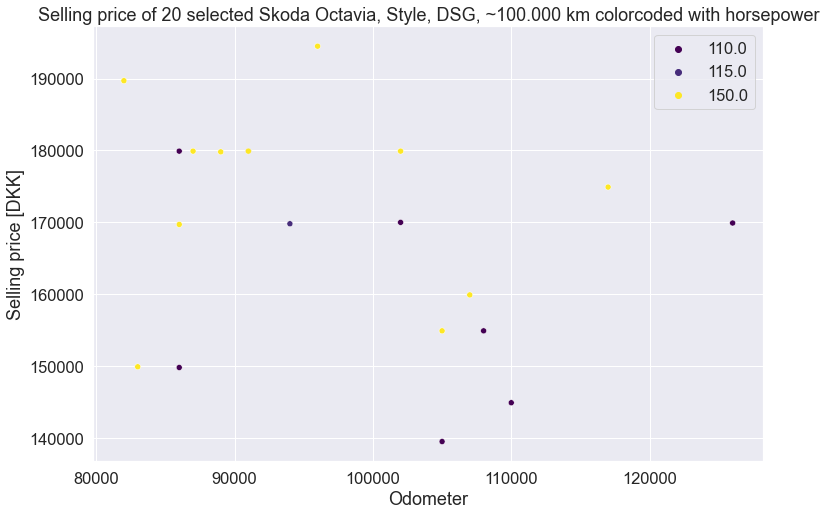

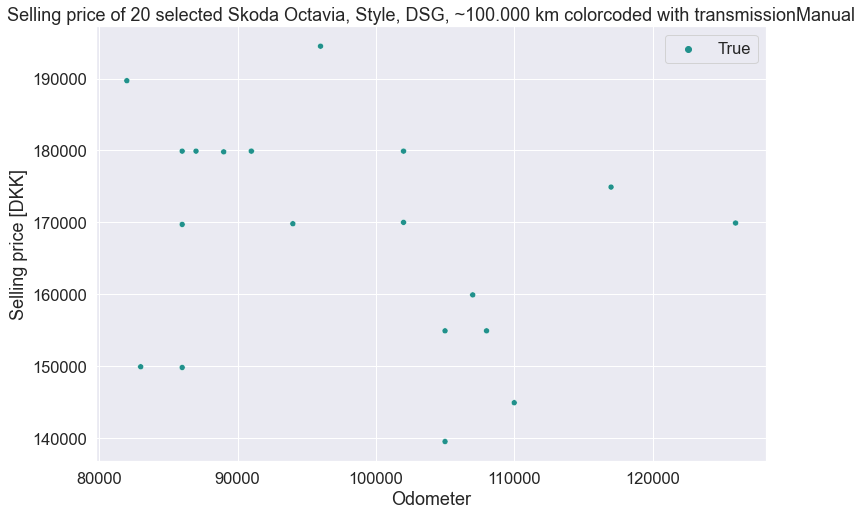

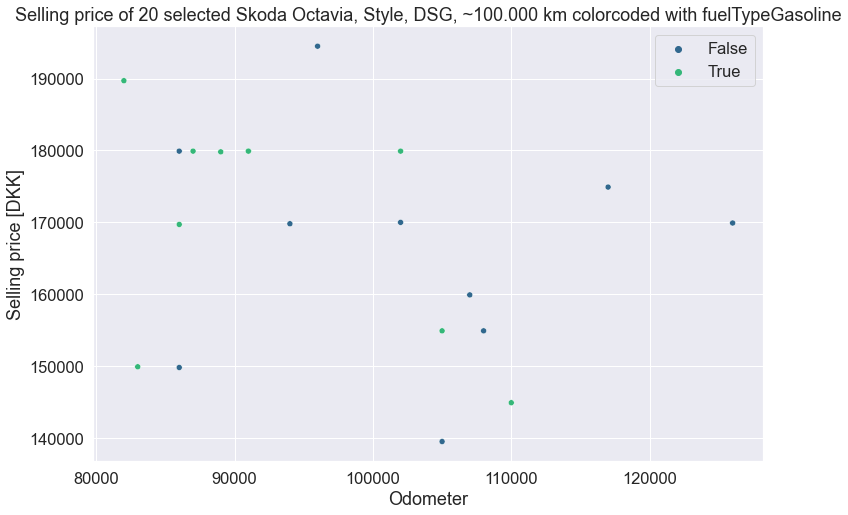

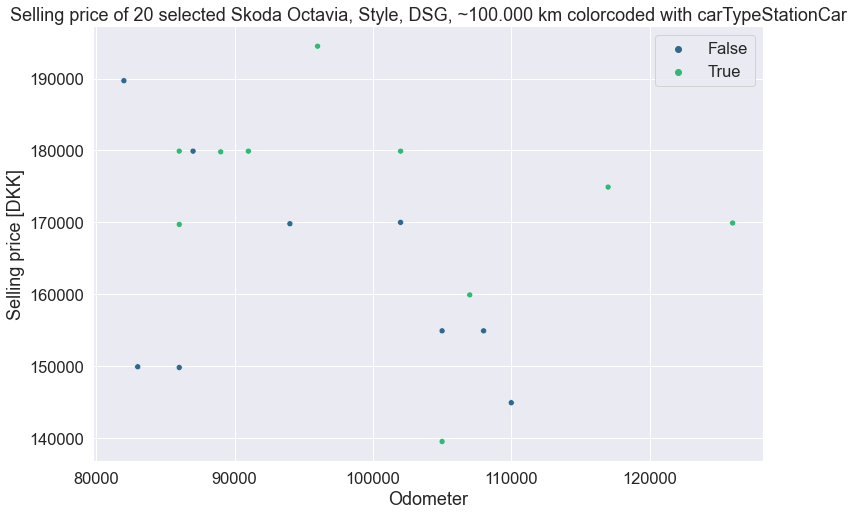

In [27]:
plt.rcParams["figure.figsize"] =(12,8)
customPalette = sns.set_palette(sns.color_palette(['#ffffd9','#edf8b1','#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']))
for hue in [
    'year',
    'horsepower',
    'transmissionManual',
    'fuelTypeGasoline',
    'carTypeStationCar',
    #'trim',
    #'engineSize',
    #'region',
    ]:
    ax = sns.scatterplot(x="odometer", y="price", hue=df_selected[hue].tolist(), data=df_selected,palette='viridis')
    ax.set_ylabel('Selling price [DKK]');
    ax.set_xlabel('Odometer');
    ax.set_title(f'Selling price of {df_selected.shape[0]} selected {selected_name} colorcoded with {hue}');
    plt.show()